In [1]:
import math
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('IPL_ball_by_ball_updated.csv')

In [3]:
df.head(3)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,6.8,Royal Challengers Bangalore,Kolkata Knight Riders,MV Boucher,CL White,AB Agarkar,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,2.7,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,AB Dinda,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.1,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
dhoni_runs = df[df.striker == 'MS Dhoni']
csk_team=df[df.batting_team == 'Chennai Super Kings']


In [5]:
csk_team.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23409 entries, 461 to 208039
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   match_id                23409 non-null  int64  
 1   season                  23409 non-null  int64  
 2   start_date              23409 non-null  object 
 3   venue                   23409 non-null  object 
 4   innings                 23409 non-null  int64  
 5   ball                    23409 non-null  float64
 6   batting_team            23409 non-null  object 
 7   bowling_team            23409 non-null  object 
 8   striker                 23409 non-null  object 
 9   non_striker             23409 non-null  object 
 10  bowler                  23409 non-null  object 
 11  runs_off_bat            23409 non-null  int64  
 12  extras                  23409 non-null  int64  
 13  wides                   705 non-null    float64
 14  noballs                 108 non-nul

In [6]:
#total runs scored by Dhoni in IPL 
print(sum(dhoni_runs.runs_off_bat))
print(len(dhoni_runs.season.unique()))
print(" avg runs per season :: ", sum(dhoni_runs.runs_off_bat)/len(dhoni_runs.season.unique()))

4746
14
 avg runs per season ::  339.0


In [7]:
#Total balls faced by Dhoni in IPL 
print(len(dhoni_runs))

3604


In [8]:
#Dhoni's Strike rate 
100* sum(dhoni_runs.runs_off_bat)/len(dhoni_runs)

131.68701442841288

In [9]:
dhoni_runs[dhoni_runs.season>2020].head(100)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
194050,1254059,2021,2021-04-10,"Wankhede Stadium, Mumbai",1,15.2,Chennai Super Kings,Delhi Capitals,MS Dhoni,RA Jadeja,Avesh Khan,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194051,1254059,2021,2021-04-10,"Wankhede Stadium, Mumbai",1,15.3,Chennai Super Kings,Delhi Capitals,MS Dhoni,RA Jadeja,Avesh Khan,0,0,NaN,NaN,NaN,NaN,NaN,bowled,MS Dhoni,NaN,NaN
196495,1254069,2021,2021-04-19,"Wankhede Stadium, Mumbai",1,15.4,Chennai Super Kings,Rajasthan Royals,MS Dhoni,RA Jadeja,Mustafizur Rahman,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196497,1254069,2021,2021-04-19,"Wankhede Stadium, Mumbai",1,15.6,Chennai Super Kings,Rajasthan Royals,MS Dhoni,RA Jadeja,Mustafizur Rahman,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196499,1254069,2021,2021-04-19,"Wankhede Stadium, Mumbai",1,16.2,Chennai Super Kings,Rajasthan Royals,MS Dhoni,RA Jadeja,CH Morris,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206153,1254094,2021,2021-10-07,Dubai International Cricket Stadium,1,11.6,Chennai Super Kings,Punjab Kings,MS Dhoni,F du Plessis,Ravi Bishnoi,0,0,NaN,NaN,NaN,NaN,NaN,bowled,MS Dhoni,NaN,NaN
206372,1254094,2021,2021-10-07,Dubai International Cricket Stadium,1,10.3,Chennai Super Kings,Punjab Kings,MS Dhoni,F du Plessis,Harpreet Brar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206381,1254094,2021,2021-10-07,Dubai International Cricket Stadium,1,10.2,Chennai Super Kings,Punjab Kings,MS Dhoni,F du Plessis,Harpreet Brar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206382,1254094,2021,2021-10-07,Dubai International Cricket Stadium,1,10.1,Chennai Super Kings,Punjab Kings,MS Dhoni,F du Plessis,Harpreet Brar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


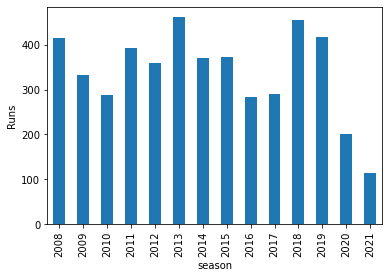

In [10]:
dhoni_runs.groupby(['season'])['runs_off_bat'].sum().plot(kind = 'bar')
plt.ylabel("Runs")
plt.show()

In [11]:
#dhoni last 3 season df i.e 2019,2020,2021
dhoni_last3_season=dhoni_runs[dhoni_runs.season > 2018]


In [12]:
#dhoni bfe season df i.e 2008 to 2018
dhoni_bfe_season=dhoni_runs[dhoni_runs.season < 2018]

In [13]:
dhoni_bfe_season.tail(2)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
150330,1082650,2017,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",2,14.4,Rising Pune Supergiant,Mumbai Indians,MS Dhoni,SPD Smith,SL Malinga,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150334,1082650,2017,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",2,16.2,Rising Pune Supergiant,Mumbai Indians,MS Dhoni,SPD Smith,JJ Bumrah,0,0,NaN,NaN,NaN,NaN,NaN,caught,MS Dhoni,NaN,NaN


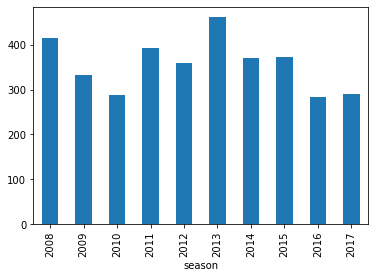

In [14]:
dhoni_bfe_season.groupby(['season'])['runs_off_bat'].sum().plot(kind = 'bar')
plt.show()

In [15]:
dhoni_last3_season.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
165761,1175360,2019,2019-03-26,Arun Jaitley Stadium,2,14.6,Chennai Super Kings,Delhi Capitals,MS Dhoni,KM Jadhav,AR Patel,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165764,1175360,2019,2019-03-26,Arun Jaitley Stadium,2,15.5,Chennai Super Kings,Delhi Capitals,MS Dhoni,KM Jadhav,K Rabada,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165765,1175360,2019,2019-03-26,Arun Jaitley Stadium,2,15.6,Chennai Super Kings,Delhi Capitals,MS Dhoni,KM Jadhav,K Rabada,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165766,1175360,2019,2019-03-26,Arun Jaitley Stadium,2,16.1,Chennai Super Kings,Delhi Capitals,MS Dhoni,KM Jadhav,AR Patel,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165767,1175360,2019,2019-03-26,Arun Jaitley Stadium,2,16.2,Chennai Super Kings,Delhi Capitals,MS Dhoni,KM Jadhav,AR Patel,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
dhoni_last3_season.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 603 entries, 165761 to 207133
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   match_id                603 non-null    int64  
 1   season                  603 non-null    int64  
 2   start_date              603 non-null    object 
 3   venue                   603 non-null    object 
 4   innings                 603 non-null    int64  
 5   ball                    603 non-null    float64
 6   batting_team            603 non-null    object 
 7   bowling_team            603 non-null    object 
 8   striker                 603 non-null    object 
 9   non_striker             603 non-null    object 
 10  bowler                  603 non-null    object 
 11  runs_off_bat            603 non-null    int64  
 12  extras                  603 non-null    int64  
 13  wides                   15 non-null     float64
 14  noballs                 4 non-null

In [17]:
print(dhoni_last3_season[dhoni_last3_season.ball<6.0])

        match_id  season  start_date                                venue  innings  ball         batting_team                 bowling_team   striker   non_striker       bowler  runs_off_bat  extras  wides  noballs  byes  legbyes  penalty wicket_type player_dismissed  other_wicket_type  other_player_dismissed
167252  1175367   2019    2019-03-31  MA Chidambaram Stadium               1        4.6   Chennai Super Kings  Rajasthan Royals             MS Dhoni  SK Raina      DS Kulkarni  0             0      NaN    NaN      NaN   NaN      NaN       NaN         NaN             NaN                NaN                    
167278  1175367   2019    2019-03-31  MA Chidambaram Stadium               1        5.4   Chennai Super Kings  Rajasthan Royals             MS Dhoni  SK Raina      JC Archer    0             0      NaN    NaN      NaN   NaN      NaN       NaN         NaN             NaN                NaN                    
167279  1175367   2019    2019-03-31  MA Chidambaram Stadium          

In [18]:
# slicing the data based on overs power play, middle over, death overs.
dhoni_pp=dhoni_last3_season[dhoni_last3_season.ball<6]
dhoni_mo=dhoni_last3_season[(dhoni_last3_season.ball>6) & (dhoni_last3_season.ball<16)]
dhoni_do=dhoni_last3_season[(dhoni_last3_season.ball>16)]

In [19]:
print(len(dhoni_pp))
print(len(dhoni_mo))
print(len(dhoni_do))

26
326
251


In [20]:
print(sum(dhoni_pp.runs_off_bat))
print(sum(dhoni_mo.runs_off_bat))
print(sum(dhoni_do.runs_off_bat))

18
296
416


In [21]:
#SR based on overs
print(100*sum(dhoni_pp.runs_off_bat)/len(dhoni_pp))
print(100*sum(dhoni_mo.runs_off_bat)/len(dhoni_mo))
print(100*sum(dhoni_do.runs_off_bat)/len(dhoni_do))

69.23076923076923
90.79754601226993
165.73705179282868


In [22]:
#Number of Dots, ones, twos, three's, four and Sixers
dots=0
ones=0
twos=0
threes=0
fours=0
sixers=0
for index, row in dhoni_do.iterrows():
    if row['runs_off_bat'] == 0:
        dots=dots+1
    elif row['runs_off_bat'] == 1:
        ones=ones+1
    elif row['runs_off_bat'] == 2:
        twos=twos+1
    elif row['runs_off_bat'] == 3:
        threes=threes+1
    elif row['runs_off_bat'] == 4:
        fours=fours+1
    elif row['runs_off_bat'] == 6:
        sixers=sixers+1
        
print(dots, "SR ::", 100*dots/len(dhoni_do))
print(ones, "SR ::", 100*ones/len(dhoni_do))
print(twos, "SR ::", 100*twos/len(dhoni_do))
print(threes, "SR ::", 100*threes/len(dhoni_do))
print(fours, "SR ::", 100*fours/len(dhoni_do))
print(sixers, "SR ::", 100*sixers/len(dhoni_do))
    

86 SR :: 34.26294820717131
80 SR :: 31.872509960159363
26 SR :: 10.358565737051793
0 SR :: 0.0
35 SR :: 13.944223107569721
24 SR :: 9.56175298804781


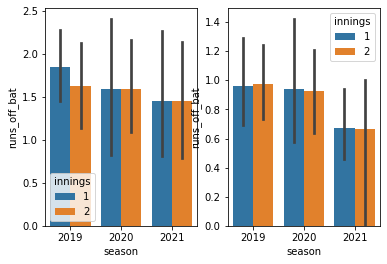

In [23]:
#dhoni_do.groupby(['season'])['runs_off_bat'].sum()
fig, ax =plt.subplots(1,2)
sns.barplot(data=dhoni_do, x='season', y='runs_off_bat', hue='innings' , ax=ax[0] )
sns.barplot(data=dhoni_mo, x='season', y='runs_off_bat', hue='innings', ax=ax[1] )
fig.show()

In [24]:
#csk other player score other than dhoni
csk_team_exe_dhoni=csk_team[csk_team.striker != 'MS Dhoni']

In [25]:
# slicing the data based on overs power play, middle over, death overs for CSK.
csk_pp=csk_team_exe_dhoni[csk_team_exe_dhoni.ball<6]
csk_mo=csk_team_exe_dhoni[(csk_team_exe_dhoni.ball>6) & (csk_team_exe_dhoni.ball<16)]
csk_do=csk_team_exe_dhoni[(csk_team_exe_dhoni.ball>16)]
csk_team_with_dhoni_do=csk_team[(csk_team.ball>16)]

In [26]:
csk_do_last3_season_exe_dhoni=csk_do[csk_do.season>2018]

In [27]:
csk_do_last3_season=csk_team_with_dhoni_do[csk_team_with_dhoni_do.season>2018]

In [28]:
print(100*sum(csk_do_last3_season.runs_off_bat)/len(csk_do_last3_season))

165.49429657794676


In [29]:
dots=0
ones=0
twos=0
threes=0
fours=0
sixers=0
for index, row in csk_do_last3_season.iterrows():
    if row['runs_off_bat'] == 0:
        dots=dots+1
    elif row['runs_off_bat'] == 1:
        ones=ones+1
    elif row['runs_off_bat'] == 2:
        twos=twos+1
    elif row['runs_off_bat'] == 3:
        threes=threes+1
    elif row['runs_off_bat'] == 4:
        fours=fours+1
    elif row['runs_off_bat'] == 6:
        sixers=sixers+1
        
print(dots, "SR ::", 100*dots/len(csk_do_last3_season))
print(ones, "SR ::", 100*ones/len(csk_do_last3_season))
print(twos, "SR ::", 100*twos/len(csk_do_last3_season))
print(threes, "SR ::", 100*threes/len(csk_do_last3_season))
print(fours, "SR ::", 100*fours/len(csk_do_last3_season))
print(sixers, "SR ::", 100*sixers/len(csk_do_last3_season))

332 SR :: 31.55893536121673
380 SR :: 36.12167300380228
100 SR :: 9.505703422053232
1 SR :: 0.09505703422053231
138 SR :: 13.11787072243346
101 SR :: 9.600760456273765


In [ ]:
csk_do_last3_season.

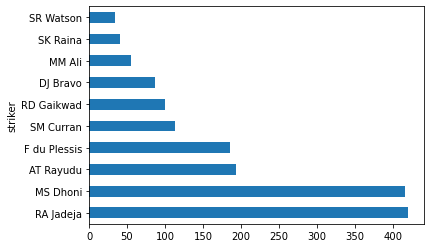

<Figure size 720x576 with 0 Axes>

<AxesSubplot:xlabel='season', ylabel='runs_off_bat'>

In [30]:
csk_do_last3_season.groupby(['striker'])['runs_off_bat'].sum().sort_values(ascending = False).head(10).plot(kind = 'barh')
plt.figure(figsize=(10, 8))
plt.show()
sns.barplot(data=dhoni_do, x='season', y='runs_off_bat', hue='innings' , ax=ax[0] )

In [31]:
print(csk_do_last3_season.groupby(['striker'])['runs_off_bat'].sum())
print(csk_do_last3_season.groupby(['striker'])['ball'].count())

striker
AT Rayudu          193
DJ Bravo           87 
DL Chahar          15 
F du Plessis       185
Harbhajan Singh    1  
Imran Tahir        13 
KM Jadhav          30 
MJ Santner         18 
MM Ali             55 
MM Sharma          0  
MS Dhoni           416
RA Jadeja          420
RD Gaikwad         100
SK Raina           41 
SM Curran          113
SN Thakur          20 
SR Watson          34 
Name: runs_off_bat, dtype: int64
striker
AT Rayudu          130
DJ Bravo           52 
DL Chahar          18 
F du Plessis       83 
Harbhajan Singh    3  
Imran Tahir        8  
KM Jadhav          46 
MJ Santner         9  
MM Ali             27 
MM Sharma          2  
MS Dhoni           251
RA Jadeja          240
RD Gaikwad         55 
SK Raina           30 
SM Curran          67 
SN Thakur          12 
SR Watson          19 
Name: ball, dtype: int64


In [32]:
df_do=df[df.ball>16]

In [33]:
df_do_last_3season=df_do[df_do.season>2018]

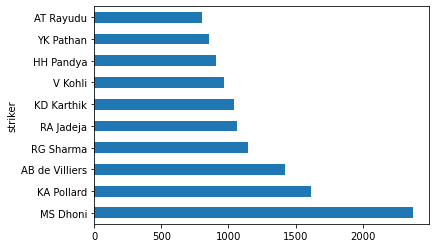

<Figure size 720x576 with 0 Axes>

In [34]:
df_do.groupby(['striker'])['runs_off_bat'].sum().sort_values(ascending = False).head(10).plot(kind = 'barh')
plt.figure(figsize=(10, 8))
plt.show()

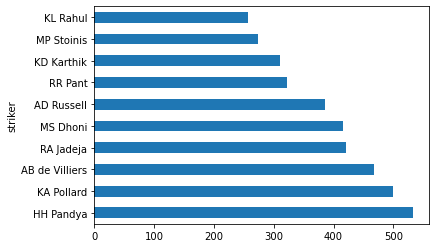

<Figure size 720x576 with 0 Axes>

In [35]:
df_ball_details=df_do_last_3season.groupby(['striker'])['runs_off_bat'].sum().sort_values(ascending = False).head(10)
df_ball_details=df_ball_details.reset_index()
df_do_last_3season.groupby(['striker'])['runs_off_bat'].sum().sort_values(ascending = False).head(10).plot(kind = 'barh')
plt.figure(figsize=(10, 8))
plt.show()

In [36]:
df_ball_details.head(10)

,striker,runs_off_bat
0,HH Pandya,533
1,KA Pollard,499
2,AB de Villiers,468
3,RA Jadeja,420
4,MS Dhoni,416
5,AD Russell,385
6,RR Pant,322
7,KD Karthik,310
8,MP Stoinis,274
9,KL Rahul,257


<AxesSubplot:xlabel='striker', ylabel='runs_off_bat'>

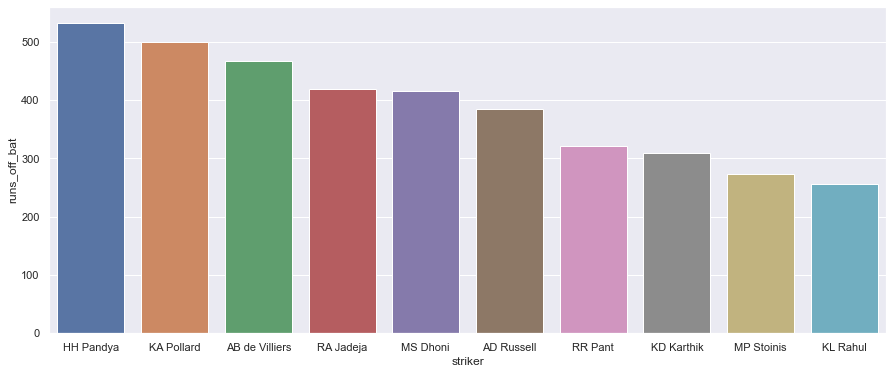

In [37]:
sns.set(rc = {'figure.figsize':(15,6)})
sns.barplot(data=df_ball_details, x='striker', y='runs_off_bat'  )

In [38]:
def balls_per_dismissal(balls, dismissals):
    if dismissals > 0:
        return balls/dismissals
    else:
        return balls/1 
    
def balls_per_boundary(balls, boundaries):
    if boundaries > 0:
        return balls/boundaries
    else:
        return balls/1 

def playerStatistics(ball_by_ball_df):
    
    ball_by_ball_df['isDot'] = ball_by_ball_df['runs_off_bat'].apply(lambda x: 1 if x == 0 else 0)
    ball_by_ball_df['isOne'] = ball_by_ball_df['runs_off_bat'].apply(lambda x: 1 if x == 1 else 0)
    ball_by_ball_df['isTwo'] = ball_by_ball_df['runs_off_bat'].apply(lambda x: 1 if x == 2 else 0)
    ball_by_ball_df['isThree'] = ball_by_ball_df['runs_off_bat'].apply(lambda x: 1 if x == 3 else 0)
    ball_by_ball_df['isFour'] = ball_by_ball_df['runs_off_bat'].apply(lambda x: 1 if x == 4 else 0)
    ball_by_ball_df['isSix'] = ball_by_ball_df['runs_off_bat'].apply(lambda x: 1 if x == 6 else 0)
    
    runs = pd.DataFrame(ball_by_ball_df.groupby(['striker'])['runs_off_bat'].sum().reset_index()).groupby(['striker'])['runs_off_bat'].sum().reset_index().rename(columns={'runs_off_bat':'runs'})
    innings = pd.DataFrame(ball_by_ball_df.groupby(['striker'])['match_id'].apply(lambda x: len(list(np.unique(x)))).reset_index()).rename(columns = {'match_id':'innings'})
    balls = pd.DataFrame(ball_by_ball_df.groupby(['striker'])['match_id'].count()).reset_index().rename(columns = {'match_id':'balls'})
    dismissals = pd.DataFrame(ball_by_ball_df.groupby(['striker'])['player_dismissed'].count()).reset_index().rename(columns = {'player_dismissed':'dismissals'})
    
    dots = pd.DataFrame(ball_by_ball_df.groupby(['striker'])['isDot'].sum()).reset_index().rename(columns = {'isDot':'dots'})
    ones = pd.DataFrame(ball_by_ball_df.groupby(['striker'])['isOne'].sum()).reset_index().rename(columns = {'isOne':'ones'})
    twos = pd.DataFrame(ball_by_ball_df.groupby(['striker'])['isTwo'].sum()).reset_index().rename(columns = {'isTwo':'twos'})
    threes = pd.DataFrame(ball_by_ball_df.groupby(['striker'])['isThree'].sum()).reset_index().rename(columns = {'isThree':'threes'})
    fours = pd.DataFrame(ball_by_ball_df.groupby(['striker'])['isFour'].sum()).reset_index().rename(columns = {'isFour':'fours'})
    sixes = pd.DataFrame(ball_by_ball_df.groupby(['striker'])['isSix'].sum()).reset_index().rename(columns = {'isSix':'sixes'})
    
    ball_by_ball_df = pd.merge(innings, runs, on = 'striker').merge(balls, on = 'striker').merge(dismissals, on = 'striker').merge(dots, on = 'striker').merge(ones, on = 'striker').merge(twos, on = 'striker').merge(threes, on = 'striker').merge(fours, on = 'striker').merge(sixes, on = 'striker')
    
    #StrikeRate
    ball_by_ball_df['SR'] = ball_by_ball_df.apply(lambda x: 100*(x['runs']/x['balls']), axis = 1)

    #runs per innings
    ball_by_ball_df['RPI'] = ball_by_ball_df.apply(lambda x: x['runs']/x['innings'], axis = 1)

    #balls per dismissals
    ball_by_ball_df['BPD'] = ball_by_ball_df.apply(lambda x: balls_per_dismissal(x['balls'], x['dismissals']), axis = 1)

    #balls per boundary
    ball_by_ball_df['BPB'] = ball_by_ball_df.apply(lambda x: balls_per_boundary(x['balls'], (x['fours'] + x['sixes'])), axis = 1)
    
    # Rate of dot balls
    ball_by_ball_df['Dot_Ball_Rate'] = ball_by_ball_df.apply(lambda x: 100*(x['dots']/x['balls']), axis = 1)
    
    return ball_by_ball_df

In [39]:
top_10_players=df_do_last_3season[(df_do_last_3season.striker =='HH Pandya') |
                                (df_do_last_3season.striker =='KA Pollard') |
                                (df_do_last_3season.striker =='AB de Villiers') |
                                (df_do_last_3season.striker =='RA Jadeja')|
                                (df_do_last_3season.striker =='MS Dhoni') |
                                 (df_do_last_3season.striker =='AD Russell')|
                                (df_do_last_3season.striker =='RR Pant')|
                                (df_do_last_3season.striker =='KD Karthik')|
                                (df_do_last_3season.striker =='MP Stoinis' )|
                                (df_do_last_3season.striker =='KL Rahul')]
top_10_players=top_10_players[(top_10_players.ball>16)]
top_10_players.tail()
##

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
207366,1254115,2021,2021-10-11,Sharjah Cricket Stadium,2,17.1,Kolkata Knight Riders,Royal Challengers Bangalore,KD Karthik,SP Narine,Mohammed Siraj,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207369,1254115,2021,2021-10-11,Sharjah Cricket Stadium,2,17.4,Kolkata Knight Riders,Royal Challengers Bangalore,KD Karthik,EJG Morgan,Mohammed Siraj,0,0,NaN,NaN,NaN,NaN,NaN,caught,KD Karthik,NaN,NaN
207610,1254116,2021,2021-10-13,Sharjah Cricket Stadium,2,16.5,Kolkata Knight Riders,Delhi Capitals,KD Karthik,RA Tripathi,Avesh Khan,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207611,1254116,2021,2021-10-13,Sharjah Cricket Stadium,2,16.6,Kolkata Knight Riders,Delhi Capitals,KD Karthik,RA Tripathi,Avesh Khan,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207617,1254116,2021,2021-10-13,Sharjah Cricket Stadium,2,17.6,Kolkata Knight Riders,Delhi Capitals,KD Karthik,RA Tripathi,K Rabada,0,0,NaN,NaN,NaN,NaN,NaN,bowled,KD Karthik,NaN,NaN


In [40]:
top_10_players.groupby(['striker'])['runs_off_bat'].sum().sort_values(ascending = False).head(10)
palyer_stats=playerStatistics(top_10_players)


In [41]:
palyer_stats.sort_values(by=['SR'],  ascending=False).reset_index(drop=True)

,striker,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,SR,RPI,BPD,BPB,Dot_Ball_Rate
0,AB de Villiers,22,468,209,11,51,69,19,1,28,41,223.923445,21.272727,19.000000,3.028986,24.401914
1,AD Russell,17,385,182,12,73,41,4,0,24,40,211.538462,22.647059,15.166667,2.843750,40.109890
2,HH Pandya,28,533,269,16,84,83,22,0,37,43,198.141264,19.035714,16.812500,3.362500,31.226766
3,KA Pollard,28,499,257,13,83,81,19,2,29,43,194.163424,17.821429,19.769231,3.569444,32.295720
4,KL Rahul,16,257,140,10,36,53,15,0,21,15,183.571429,16.062500,14.000000,3.888889,25.714286
5,RR Pant,26,322,178,16,55,59,14,1,31,18,180.898876,12.384615,11.125000,3.632653,30.898876
6,KD Karthik,22,310,175,11,47,66,17,0,30,15,177.142857,14.090909,15.909091,3.888889,26.857143
7,RA Jadeja,29,420,240,8,67,88,26,0,37,22,175.000000,14.482759,30.000000,4.067797,27.916667
8,MP Stoinis,21,274,163,9,48,56,19,0,30,10,168.098160,13.047619,18.111111,4.075000,29.447853
9,MS Dhoni,26,416,251,14,86,80,26,0,35,24,165.737052,16.000000,17.928571,4.254237,34.262948
